In [4]:
import cv2
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-02 235900.png"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (5, 5), 0)
# Optional preprocessing: apply thresholding to improve OCR results
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Save the preprocessed image for inspection
cv2.imwrite(r'D:\cv\scoreboard_preprocessed.PNG', thresh)

# Perform OCR on the image
text = pytesseract.image_to_string(thresh)

# Output the extracted text
print("Extracted text:\n", text)

Extracted text:
 reRA EK Oo: eax IND SED 14 ores AMR
a PaMy 42 30 RUN RATE 6.96




In [3]:
import cv2
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-02 235900.png"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# Optional preprocessing: apply thresholding to improve OCR results
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Save the preprocessed image for inspection
cv2.imwrite(r'D:\cv\scoreboard_preprocessed.PNG', thresh)

# Perform OCR on the image
text = pytesseract.image_to_string(thresh)

# Output the extracted text
print("Extracted text:\n", text)

Extracted text:
 reGR Ee (e) oan. IND r 96-5 | 14 ont

yar 42 RUN RATE 6 98




(-0.5, 557.5, 102.5, -0.5)

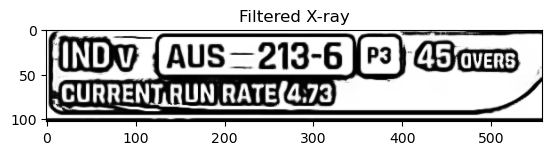

In [3]:
import matplotlib.pyplot as plt
plt.title("Filtered X-ray")
plt.imshow(denoised , cmap= 'gray')
plt.axis("on")


In [47]:
import cv2
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-03 113742.png"
image = cv2.imread(image_path)

# Resize the image to improve OCR on small text
scale_percent = 150  # Increase image size by 150%
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

# Convert the image to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply adaptive thresholding to enhance contrast
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Optionally denoise the image
denoised = cv2.fastNlMeansDenoising(thresh, h=65)

# Save the preprocessed image for inspection
# cv2.imwrite(r'D:\cv\scoreboard_preprocessed.PNG', denoised)

# Perform OCR with custom configuration
custom_config = r'--oem 3 --psm 6'  # Use the LSTM OCR engine and assume a uniform block of text
text = pytesseract.image_to_string(denoised, config=custom_config)

# Output the extracted text
print("Extracted text:\n", text)


Extracted text:
 ODv (aus—213-6 rs)
TCURRENT:RUN RATE(4:73



In [4]:
import cv2
import easyocr

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-03 124836.png"
image = cv2.imread(image_path)

# Resize the image to improve OCR on small text
scale_percent = 150  # Increase image size by 150%
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

# Convert the image to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply adaptive thresholding to enhance contrast
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Optionally denoise the image
denoised = cv2.fastNlMeansDenoising(thresh, h=65)

# Save the preprocessed image for inspection
# cv2.imwrite(r'D:\cv\scoreboard_preprocessed.PNG', denoised)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Specify the language(s) to use

# Perform OCR on the processed image
results = reader.readtext(denoised)

# Output the extracted text
print("Extracted text:\n")
for (bbox, text, prob) in results:
    print(f"Detected Text: {text} (Confidence: {prob:.2f})")



Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted text:

Detected Text: AWNDv (Confidence: 0.05)
Detected Text: Aus_ (Confidence: 0.57)
Detected Text: 1-0 (Confidence: 0.61)
Detected Text: PIHOovER (Confidence: 0.15)
Detected Text: aUS WON IHE Toss & ELECTEd to @ad (Confidence: 0.12)


In [18]:
import cv2

# Initialize global variables to store coordinates
coordinates = []

# Mouse callback function to capture coordinates
def get_coordinates(event, x, y, flags, param):
    global coordinates
    if event == cv2.EVENT_LBUTTONDOWN:  # Capture left mouse button click
        coordinates = [(x, y)]  # Store starting point (top-left corner)
        print(f"Start point: {coordinates[0]}")
    elif event == cv2.EVENT_LBUTTONUP:  # Capture left mouse button release
        coordinates.append((x, y))  # Store ending point (bottom-right corner)
        print(f"End point: {coordinates[1]}")
        # Draw rectangle on the image for visual feedback
        cv2.rectangle(image, coordinates[0], coordinates[1], (0, 255, 0), 2)
        cv2.imshow("Image", image)

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-02 235900.png"
image = cv2.imread(image_path)
cv2.imshow("Image", image)

# Set the mouse callback function
cv2.setMouseCallback("Image", get_coordinates)

# Wait until the user presses a key
cv2.waitKey(0)
cv2.destroyAllWindows()

# Output the coordinates
if len(coordinates) == 2:
    print(f"Top-left corner: {coordinates[0]}")
    print(f"Bottom-right corner: {coordinates[1]}")
    width = coordinates[1][0] - coordinates[0][0]
    height = coordinates[1][1] - coordinates[0][1]
    print(f"Width: {width}, Height: {height}")



Start point: (209, 531)
End point: (209, 531)
Start point: (215, 614)
End point: (215, 614)
Start point: (1066, 609)
End point: (1066, 609)
Start point: (1061, 532)
End point: (1061, 532)
Top-left corner: (1061, 532)
Bottom-right corner: (1061, 532)
Width: 0, Height: 0


In [19]:
import cv2
import pytesseract
import numpy as np

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def extract_scoreboard(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Define the coordinates of the four corners of the scoreboard
    pts_src = np.array([[209, 531], [1061, 532], [1066, 609], [215, 614]], dtype="float32")

    # Define the destination points for the warped image (rectangle with the same height and width)
    width = 1066 - 209  # Width of the scoreboard
    height = 614 - 531  # Height of the scoreboard
    pts_dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype="float32")

    # Compute the perspective transform matrix and warp the image
    matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)
    warped = cv2.warpPerspective(image, matrix, (width, height))

    # Convert the warped region to grayscale
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Optional preprocessing: apply thresholding to improve OCR results
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Save the preprocessed scoreboard image for inspection
    cv2.imwrite(r'D:\cv\scoreboard_preprocessed.PNG', thresh)

    # Perform OCR on the warped scoreboard region
    text = pytesseract.image_to_string(thresh)

    return text

# Example usage
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-02 235900.png"
scoreboard_text = extract_scoreboard(image_path)

# Output the extracted scoreboard text
print("Extracted scoreboard text:\n", scoreboard_text)


Extracted scoreboard text:
 akon 0 pax IN
eran! 425




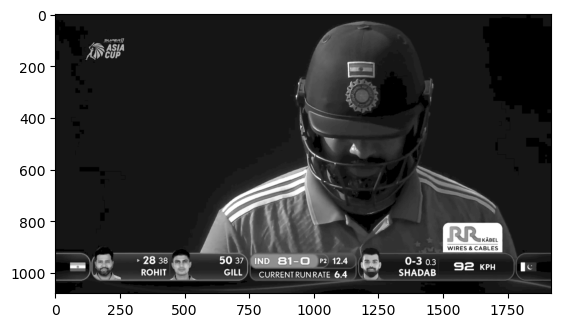

In [11]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from time import time

boxes = []

# Function to capture rectangle coordinates
def onselect(eclick, erelease):
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    boxes.append([(x1, y1), (x2, y2)])
    print(f"Box coordinates: Top-left: ({x1}, {y1}), Bottom-right: ({x2}, {y2})")

    # Crop the image
    crop = img[y1:y2, x1:x2]

    # Display the cropped image
    plt.figure()
    plt.imshow(crop, cmap='gray')
    plt.show()

    # Optionally save the cropped image
    key = input("Press 'r' to save the cropped image, or any other key to skip: ")
    if key == 'r':
        t = time()
        cv2.imwrite(f'Crop_{t}.jpg', crop)
        print("Image saved to file")

# Load the image
img = cv2.imread(r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-21 203205.png", 0)

# Display the image using matplotlib
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')

# Create a rectangle selector
rectangle_selector = RectangleSelector(ax, onselect, useblit=True, button=[1], minspanx=5, minspany=5, spancoords='pixels', interactive=True)

plt.show()


# Yahan se


In [3]:
import cv2 

img = cv2.imread(r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-21 203205.png")

x , y, h ,w = cv2.selectROI("selectROI" , img )


print(f"{x = } , {y = } , {h = } , {w = }")



# u might need to get latest version of Microsoft Visual C++ Redistributable
# https://learn.microsoft.com/en-us/cpp/windows/redistributing-visual-cpp-files?view=msvc-170

x = 745 , y = 907 , h = 433 , w = 140


: 

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [4]:
import cv2
import easyocr

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-21 203205.png"
image = cv2.imread(image_path)

# Define the coordinates for the ROI
x = 745 
y = 907
h = 433
w = 140

# Crop the image to the specified region
roi = image[y:y+h, x:x+w]

# Resize the cropped image to improve OCR on small text
scale_percent = 150  # Increase image size by 150%
width = int(roi.shape[1] * scale_percent / 100)
height = int(roi.shape[0] * scale_percent / 100)
dim = (width, height)
resized_roi = cv2.resize(roi, dim, interpolation=cv2.INTER_LINEAR)

# Convert the cropped image to grayscale
gray = cv2.cvtColor(resized_roi, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply adaptive thresholding to enhance contrast
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Optionally denoise the image
denoised = cv2.fastNlMeansDenoising(thresh, h=65)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Specify the language(s) to use

# Perform OCR on the processed image
results = reader.readtext(denoised)

# Output the extracted text
print("Extracted text from ROI:\n")
for (bbox, text, prob) in results:
    print(f"Detected Text: {text} (Confidence: {prob:.2f})")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted text from ROI:

Detected Text: WND (Confidence: 0.53)
Detected Text: @URRE (Confidence: 0.68)


In [6]:
import cv2
import easyocr

# Load the image
image_path = r"C:\Users\Hp\Pictures\Screenshots\Screenshot 2024-10-21 203205.png"
image = cv2.imread(image_path)

# Define the coordinates for the ROI
x = 745 
y = 907
h = 140
w = 433

# Highlight the ROI on the original image
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle

# Crop the image to the specified region
roi = image[y:y+h, x:x+w]

# Resize the cropped image to improve OCR on small text
scale_percent = 150  # Increase image size by 150%
width = int(roi.shape[1] * scale_percent / 100)
height = int(roi.shape[0] * scale_percent / 100)
dim = (width, height)
resized_roi = cv2.resize(roi, dim, interpolation=cv2.INTER_LINEAR)

# Convert the cropped image to grayscale
gray = cv2.cvtColor(resized_roi, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply adaptive thresholding to enhance contrast
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Optionally denoise the image
denoised = cv2.fastNlMeansDenoising(thresh, h=65)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Specify the language(s) to use

# Perform OCR on the processed image
results = reader.readtext(denoised)

# Output the extracted text
print("Extracted text from ROI:\n")
for (bbox, text, prob) in results:
    print(f"Detected Text: {text} (Confidence: {prob:.2f})")

# Display the image with the highlighted ROI
cv2.imshow("Highlighted Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted text from ROI:

Detected Text: WND (Confidence: 0.56)
Detected Text: 81-0 (Confidence: 1.00)
Detected Text: P2 (Confidence: 0.77)
Detected Text: 124 (Confidence: 0.97)
Detected Text: CURRENTRUNRAIB 6. (Confidence: 0.41)


In [11]:
import cv2
import easyocr

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Specify the language(s) to use

# Define the coordinates for the ROI
x = 745 
y = 907
h = 140
w = 433

# Capture video from a file
video_path = r"C:\Users\Hp\Downloads\test - Made with Clipchamp.mp4"
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Define how many frames to skip
frame_skip = 10  # Change this value to process every nth frame

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Skip frames
    if frame_count % frame_skip != 0:
        continue

    # Calculate timestamp in seconds
    timestamp = frame_count / fps

    # Crop the image to the specified region
    roi = frame[y:y + h, x:x + w]

    # Resize the cropped image to improve OCR on small text
    scale_percent = 150  # Increase image size by 150%
    width = int(roi.shape[1] * scale_percent / 100)
    height = int(roi.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_roi = cv2.resize(roi, dim, interpolation=cv2.INTER_LINEAR)

    # Convert the cropped image to grayscale
    gray = cv2.cvtColor(resized_roi, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply adaptive thresholding to enhance contrast
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Optionally denoise the image
    denoised = cv2.fastNlMeansDenoising(thresh, h=65)

    # Perform OCR on the processed image
    results = reader.readtext(denoised)

    # Output the extracted text with timestamp
    if results:
        print(f"Extracted text from ROI at {timestamp:.2f} seconds:\n")
        for (bbox, text, prob) in results:
            print(f"Detected Text: {text} (Confidence: {prob:.2f})")
    else:
        print(f"No text detected at {timestamp:.2f} seconds.")

# Release the video capture object
cap.release()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted text from ROI at 0.33 seconds:

Detected Text: n (Confidence: 0.98)
Detected Text: WONJHE toss & CHOSE (Confidence: 0.31)
Extracted text from ROI at 0.67 seconds:

Detected Text: n (Confidence: 0.97)
Detected Text: WONJHE toss & CHOSE (Confidence: 0.40)
Extracted text from ROI at 1.00 seconds:

Detected Text: n (Confidence: 0.95)
Detected Text: WONJHE toss & CHOSE (Confidence: 0.40)
Extracted text from ROI at 1.33 seconds:

Detected Text: n (Confidence: 0.98)
Detected Text: DAVIC (Confidence: 0.15)
Detected Text: WONJHE toss & CHOSE (Confidence: 0.37)
Extracted text from ROI at 1.67 seconds:

Detected Text: n (Confidence: 0.97)
Detected Text: WONJHE toss & CHOSE (Confidence: 0.48)
Extracted text from ROI at 2.00 seconds:

Detected Text: n (Confidence: 0.98)
Detected Text: Ov (Confidence: 0.54)
Detected Text: WoNTHB toss& @HOSE (Confidence: 0.14)
Extracted text from ROI at 2.33 seconds:

Detected Text: IN (Confidence: 0.20)
Detected Text: n (Confidence: 0.56)
Extracted text fr

KeyboardInterrupt: 